<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/4_Pole_Magnetic_Field_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The following script  is used to create a magnetic field visualization first using numpy, followed by a successful attempt at visualizing a 4 pole magnet arrangement using magpylib in Python.

In [1]:
# Import necessary modules for bar magnet simulation in Python
import numpy as np
import matplotlib.pyplot as plt

# The following modules are for a different magnet setup using magpylib
!pip install magpylib
import magpylib as magpy

In [3]:
# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# Some useful syntax examples for reference.
# def ():  # Reads: "define a desired term as a function of some desired term".

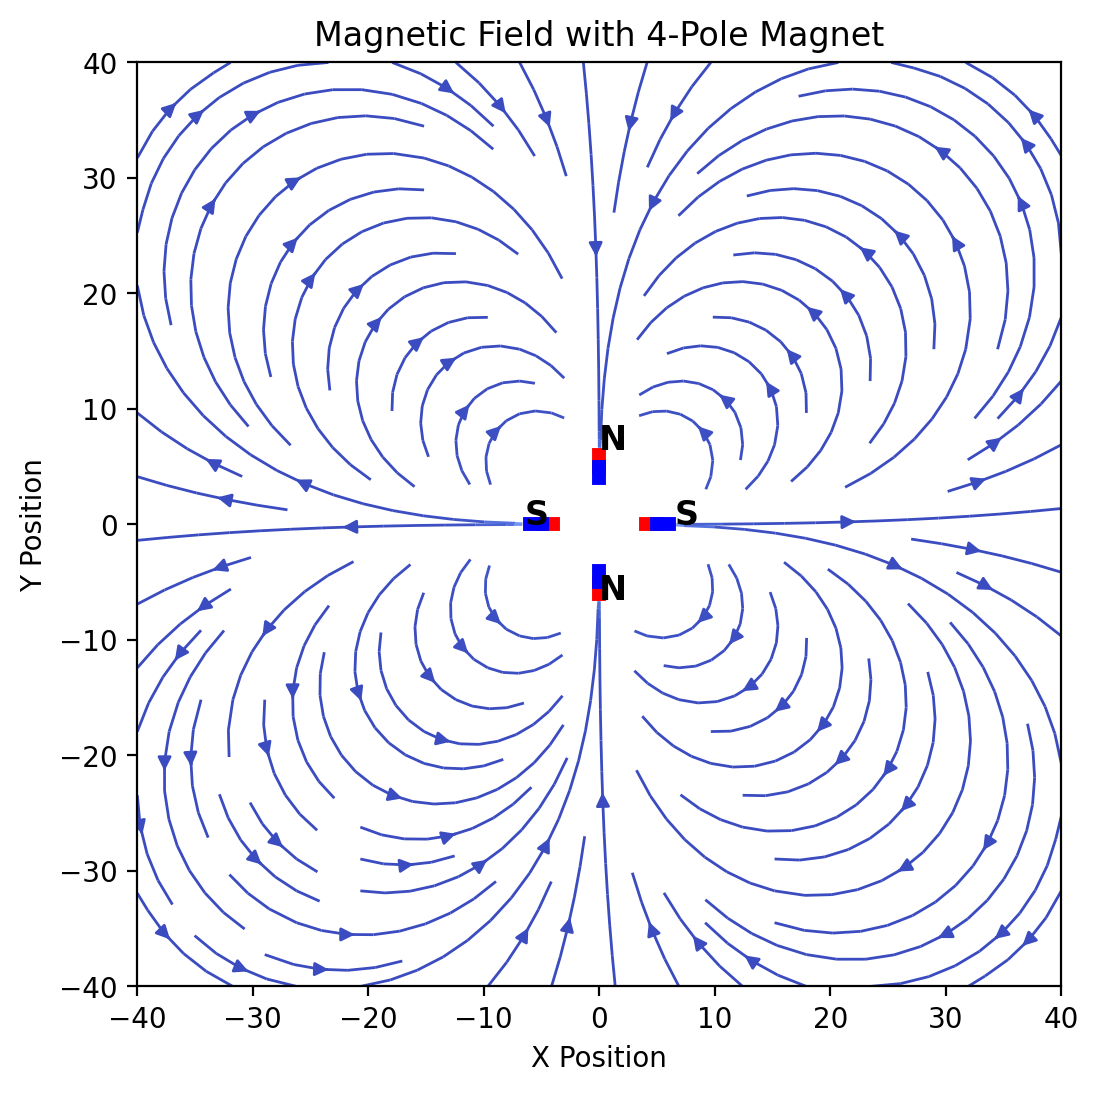

In [4]:
# Let's try with numpy in this first example
# Define positions and strengths of magnets with specified rotations
positions = [
    (-6, 0),  # Left magnet
    (6, 0),   # Right magnet
    (0, -6),  # Bottom magnet
    (0, 6)    # Top magnet
]

# Define magnet strengths with rotated top and left magnets
strengths_rotated = [1000, 1000, -1000, -1000]  # Top and left are flipped

# Expanded grid to visualize the field over a larger area
x_expanded_twice = np.linspace(-40, 40, 400)
y_expanded_twice = np.linspace(-40, 40, 400)
X_expanded_twice, Y_expanded_twice = np.meshgrid(x_expanded_twice, y_expanded_twice)

# Function to approximate magnetic field contributions
def magnetic_field(x, y, magnet_x, magnet_y, strength):
    distance_squared = (x - magnet_x)**2 + (y - magnet_y)**2
    return strength * (x - magnet_x) / distance_squared, strength * (y - magnet_y) / distance_squared

# Calculate the magnetic field contributions from each rotated magnet
Bx_rotated, By_rotated = np.zeros_like(X_expanded_twice), np.zeros_like(Y_expanded_twice)
for (magnet_x, magnet_y), strength in zip(positions, strengths_rotated):
    field_x, field_y = magnetic_field(X_expanded_twice, Y_expanded_twice, magnet_x, magnet_y, strength)
    Bx_rotated += field_x
    By_rotated += field_y

# Function to draw and label each magnet with North (N) and South (S) poles
def draw_magnet(ax, start_pos, end_pos, label_pos, label, rotate=False):
    """Draws a two-tone bar magnet with red (North) and blue (South) and labels in specific positions."""
    # Draw halves based on rotation
    if rotate:
        ax.plot([(start_pos[0] + end_pos[0]) / 2, end_pos[0]],
                [(start_pos[1] + end_pos[1]) / 2, end_pos[1]],
                color='red', linewidth=5)
        ax.plot([start_pos[0], (start_pos[0] + end_pos[0]) / 2],
                [start_pos[1], (start_pos[1] + end_pos[1]) / 2],
                color='blue', linewidth=5)
    else:
        ax.plot([start_pos[0], (start_pos[0] + end_pos[0]) / 2],
                [start_pos[1], (start_pos[1] + end_pos[1]) / 2],
                color='red', linewidth=5)
        ax.plot([(start_pos[0] + end_pos[0]) / 2, end_pos[0]],
                [(start_pos[1] + end_pos[1]) / 2, end_pos[1]],
                color='blue', linewidth=5)

    # Label the magnet's North/South with custom positions
    ax.text(label_pos[0], label_pos[1], label, fontsize=12, color='black', weight='bold')

# Plot the magnetic field with properly labeled magnets
plt.figure(figsize=(6, 6))
plt.streamplot(X_expanded_twice, Y_expanded_twice, Bx_rotated, By_rotated,
               color=np.sqrt(Bx_rotated**2 + By_rotated**2), linewidth=1, cmap='coolwarm')

# Draw magnets with specific label positions and 180-degree rotation for the left magnet
draw_magnet(plt, (-6, 0), (-4, 0), (-6.5, 0), 'S', rotate=True)  # Left magnet with label to the left, rotated 180 degrees
draw_magnet(plt, (4, 0), (6, 0), (6.5, 0), 'S')                 # Right magnet with label at the right
draw_magnet(plt, (0, -6), (0, -4), (0, -6.5), 'N')              # Bottom magnet with label below
draw_magnet(plt, (0, 6), (0, 4), (0, 6.5), 'N')                 # Top magnet with label above

# Set labels and axis properties
plt.title('Magnetic Field with 4-Pole Magnet')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().set_aspect('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=140624602749376) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()
/usr/local/lib/python3.10/dist-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=140624656349408) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()
/usr/local/lib/python3.10/dist-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=140624656337696) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()
/usr/local/lib/python3.10/dist-packages/

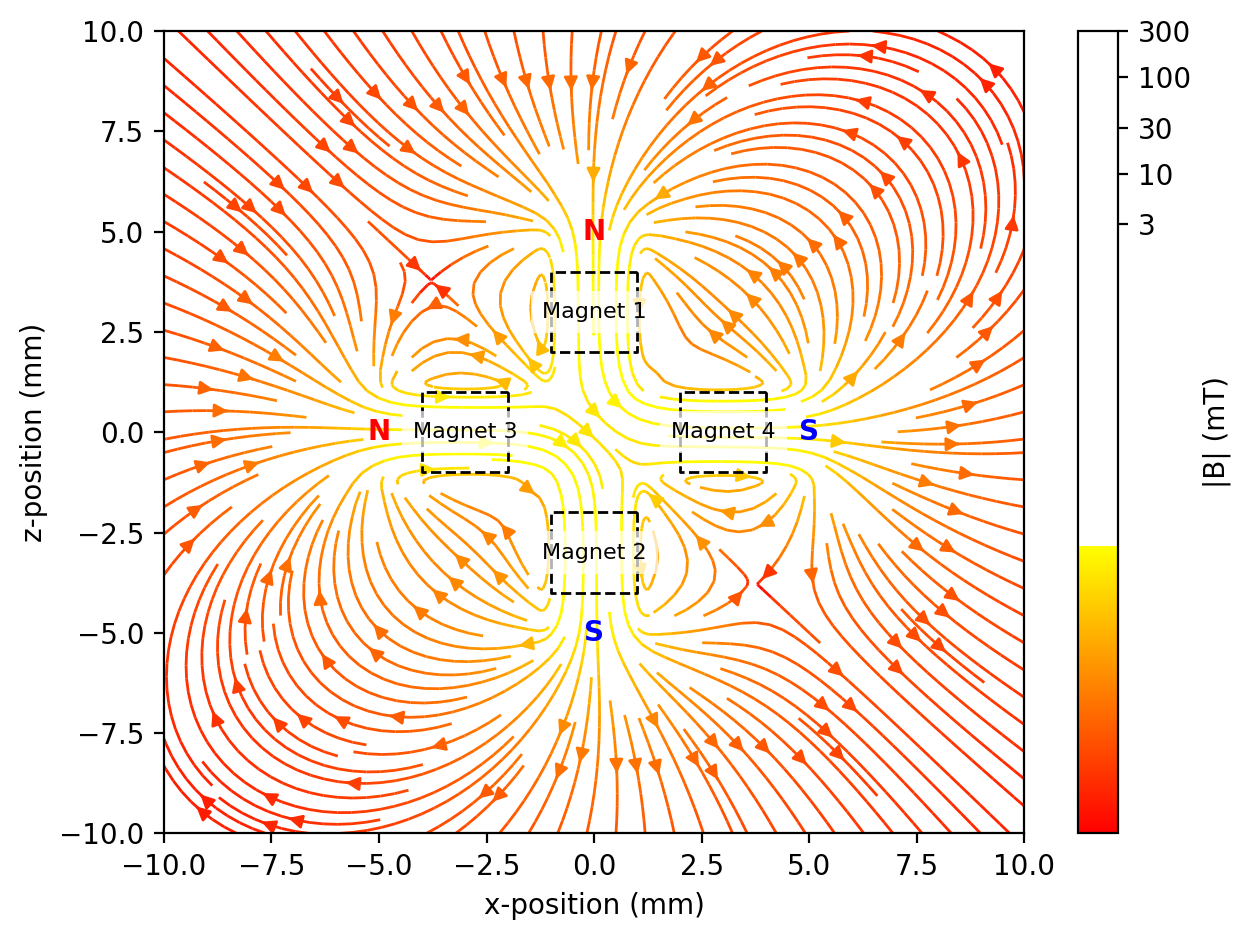

In [5]:
# Now we will try out magpylib.
# Scripts are inspired from the following URL: https://magpylib.readthedocs.io/en/stable/_pages/user_guide/examples/examples_vis_mpl_streamplot.html#examples-vis-mpl-streamplot

# Create a Matplotlib figure
fig, ax = plt.subplots()

# Create an observer grid in the xz-symmetry plane with extended range
ts = np.linspace(-10, 10, 40)  # Extend observer grid range to match plot
grid = np.array([[(x, 0, z) for x in ts] for z in ts])
X, _, Z = np.moveaxis(grid, 2, 0)

# Define magnets with specified dimensions, orientations, and increased magnetization
magnets = [
    magpy.magnet.Cuboid(magnetization=(0, 0, -1200), dimension=(2, 2, 4), position=(0, 0, 3)),   # Vertical North, 2x4, south rotated
    magpy.magnet.Cuboid(magnetization=(0, 0, -1200), dimension=(2, 2, 4), position=(0, 0, -3)),  # Vertical North, 2x4, rotated
    magpy.magnet.Cuboid(magnetization=(1200, 0, 0), dimension=(4, 2, 2), position=(-3, 0, 0)),   # Horizontal South, 4x2, rotated
    magpy.magnet.Cuboid(magnetization=(1200, 0, 0), dimension=(4, 2, 2), position=(3, 0, 0))     # Horizontal North, 4x2, north rotated
]

# Initialize B-field arrays
Bx, Bz = np.zeros(X.shape), np.zeros(Z.shape)

# Calculate the B-field of each magnet on the grid and sum them
for magnet in magnets:
    B = magnet.getB(grid)
    Bx += B[..., 0]
    Bz += B[..., 2]

# Compute the log10 of the magnetic field norm for color scaling
log10_norm_B = np.log10(np.sqrt(Bx**2 + Bz**2))

# Display the B-field with streamplot using log10-scaled color and fixed linewidth
splt = ax.streamplot(X, Z, Bx, Bz,
    density=2,
    color=log10_norm_B,
    linewidth=1,  # Set a fixed linewidth of 1
    cmap="autumn",
)

# Add colorbar with logarithmic labels
cb = fig.colorbar(splt.lines, ax=ax, label="|B| (mT)")
ticks = np.array([3, 10, 30, 100, 300])
cb.set_ticks(np.log10(ticks))
cb.set_ticklabels(ticks)

# Outline magnet boundaries and add labels
positions = [(0, 3), (0, -3), (-3, 0), (3, 0)]
labels = [
    "Magnet 1",
    "Magnet 2",
    "Magnet 3",
    "Magnet 4"
]
for pos, label in zip(positions, labels):
    ax.plot(
        [pos[0] + 1, pos[0] + 1, pos[0] - 1, pos[0] - 1, pos[0] + 1],
        [pos[1] + 1, pos[1] - 1, pos[1] - 1, pos[1] + 1, pos[1] + 1],
        "k--",
        lw=1,
    )
    # Add labels for each magnet
    ax.text(pos[0], pos[1], label, ha="center", va="center", fontsize=8, color="black", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Label outward-facing poles with color for north (red) and south (blue)
pole_labels = [
    (0, 5, "N", "red"),    # Outward pole for Magnet 1
    (0, -5, "S", "blue"),   # Outward pole for Magnet 2
    (-5, 0, "N", "red"),  # Outward pole for Magnet 3
    (5, 0, "S", "blue")    # Outward pole for Magnet 4
]
for (x, y, pole, color) in pole_labels:
    ax.text(x, y, f"{pole}", ha="center", va="center", fontsize=10, color=color, fontweight="bold")

# Figure styling
ax.set(
    xlabel="x-position (mm)",
    ylabel="z-position (mm)",
    xlim=(-10, 10),  # Set x-axis range to -10 to 10 mm
    ylim=(-10, 10)   # Set y-axis (z-direction in this plot) range to -10 to 10 mm
)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=140624655330576) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()
/usr/local/lib/python3.10/dist-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=140624617638112) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()
/usr/local/lib/python3.10/dist-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=140624655454112) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()
/usr/local/lib/python3.10/dist-packages/

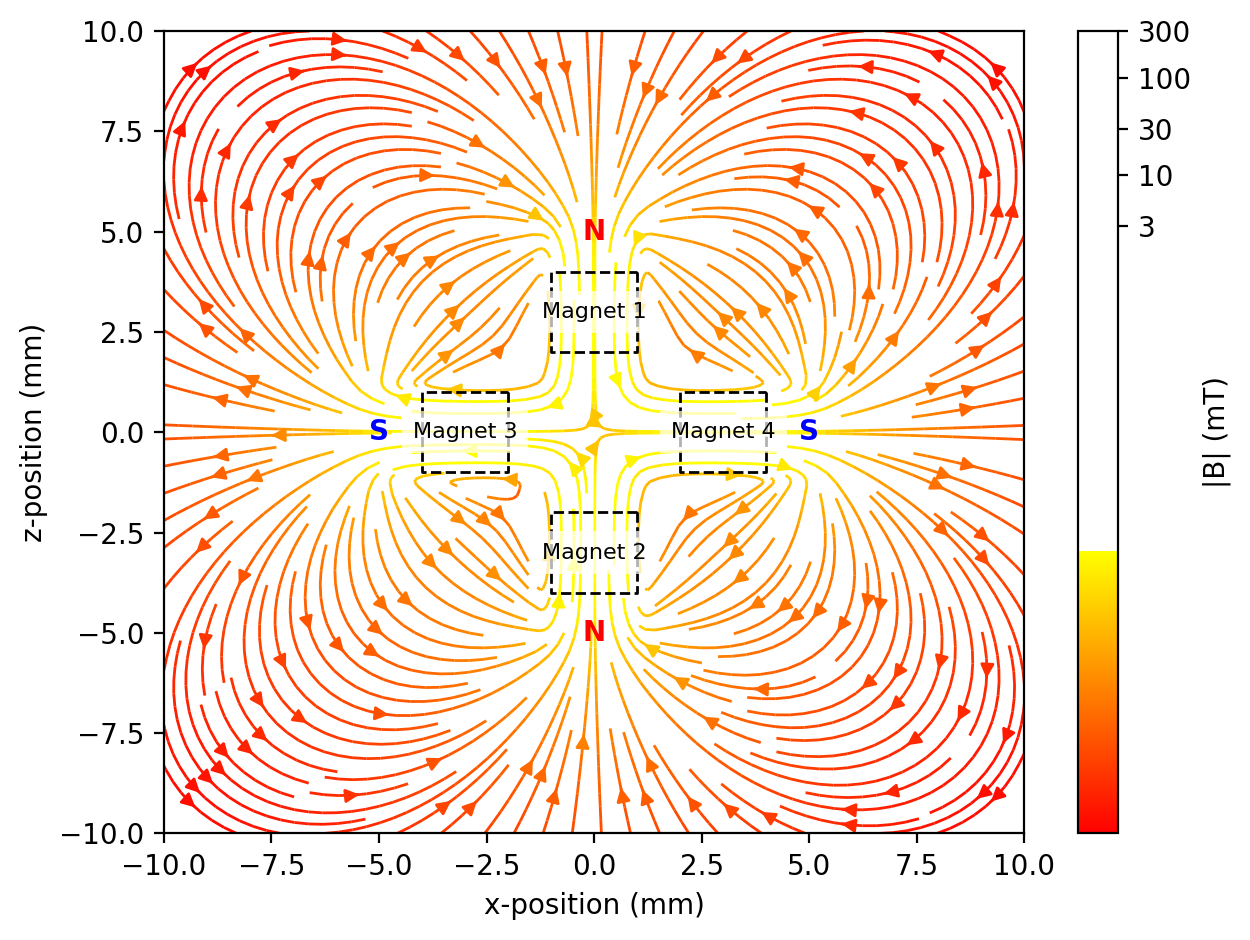

In [6]:
# Create a Matplotlib figure
fig, ax = plt.subplots()

# Create an observer grid in the xz-symmetry plane with extended range
ts = np.linspace(-10, 10, 40)  # Extend observer grid range to match plot
grid = np.array([[(x, 0, z) for x in ts] for z in ts])
X, _, Z = np.moveaxis(grid, 2, 0)

# Define magnets with specified dimensions, orientations, and increased magnetization
magnets = [
    magpy.magnet.Cuboid(magnetization=(0, 0, -1200), dimension=(2, 2, 4), position=(0, 0, 3)),   # Vertical North, 2x4, south rotated
    magpy.magnet.Cuboid(magnetization=(0, 0, 1200), dimension=(2, 2, 4), position=(0, 0, -3)),   # Vertical North, 2x4
    magpy.magnet.Cuboid(magnetization=(-1200, 0, 0), dimension=(4, 2, 2), position=(-3, 0, 0)),  # Horizontal South, 4x2, rotated
    magpy.magnet.Cuboid(magnetization=(1200, 0, 0), dimension=(4, 2, 2), position=(3, 0, 0))     # Horizontal North, 4x2, north rotated
]

# Initialize B-field arrays
Bx, Bz = np.zeros(X.shape), np.zeros(Z.shape)

# Calculate the B-field of each magnet on the grid and sum them
for magnet in magnets:
    B = magnet.getB(grid)
    Bx += B[..., 0]
    Bz += B[..., 2]

# Compute the log10 of the magnetic field norm for color scaling
log10_norm_B = np.log10(np.sqrt(Bx**2 + Bz**2))

# Display the B-field with streamplot using log10-scaled color and fixed linewidth
splt = ax.streamplot(X, Z, Bx, Bz,
    density=2,
    color=log10_norm_B,
    linewidth=1,  # Set a fixed linewidth of 1
    cmap="autumn",
)

# Add colorbar with logarithmic labels
cb = fig.colorbar(splt.lines, ax=ax, label="|B| (mT)")
ticks = np.array([3, 10, 30, 100, 300])
cb.set_ticks(np.log10(ticks))
cb.set_ticklabels(ticks)

# Outline magnet boundaries and add labels
positions = [(0, 3), (0, -3), (-3, 0), (3, 0)]
labels = [
    "Magnet 1",
    "Magnet 2",
    "Magnet 3",
    "Magnet 4"
]
for pos, label in zip(positions, labels):
    ax.plot(
        [pos[0] + 1, pos[0] + 1, pos[0] - 1, pos[0] - 1, pos[0] + 1],
        [pos[1] + 1, pos[1] - 1, pos[1] - 1, pos[1] + 1, pos[1] + 1],
        "k--",
        lw=1,
    )
    # Add labels for each magnet
    ax.text(pos[0], pos[1], label, ha="center", va="center", fontsize=8, color="black", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Label outward-facing poles with color for north (red) and south (blue)
pole_labels = [
    (0, 5, "N", "red"),    # Outward pole for Magnet 1
    (0, -5, "N", "red"),    # Outward pole for Magnet 2
    (-5, 0, "S", "blue"),   # Outward pole for Magnet 3
    (5, 0, "S", "blue")      # Outward pole for Magnet 4
]
for (x, y, pole, color) in pole_labels:
    ax.text(x, y, f"{pole}", ha="center", va="center", fontsize=10, color=color, fontweight="bold")

# Figure styling
ax.set(
    xlabel="x-position (mm)",
    ylabel="z-position (mm)",
    xlim=(-10, 10),  # Set x-axis range to -10 to 10 mm
    ylim=(-10, 10)   # Set y-axis (z-direction in this plot) range to -10 to 10 mm
)

plt.tight_layout()
plt.show()